In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
Train_data=pd.read_csv("Train_agriculture.csv",sep='\t')        # Loading data
Test_data=pd.read_csv("Test_agriculture.csv",sep='\t')

In [3]:
Train_data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [4]:
Test_data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [5]:
Train_data.columns         # Checking Train data columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [6]:
Test_data.columns         # Checking Test data columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season'],
      dtype='object')

In [7]:
Train_data.dtypes      # Checking Data types

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [8]:
Test_data.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
dtype: object

In [9]:
Train_data.isnull().sum()    # Null values in Number_Weeks_Used

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [10]:
Train_data['Number_Weeks_Used'].fillna(Train_data['Number_Weeks_Used'].mean(),inplace=True)

In [11]:
Train_data.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [12]:
Train_data.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [13]:
Train_data['Crop_Damage'].value_counts()

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

In [14]:
Test_data.isnull().sum()       #Null values in Number_Weeks_Used

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [15]:
Test_data['Number_Weeks_Used'].fillna(Test_data['Number_Weeks_Used'].mean(),inplace=True)  # Imputing Null Values

In [16]:
Test_data.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
dtype: object

In [17]:
Train_data['source']='train'         #Adding source with train and test into both Train & Test data
Test_data['source']='test'
data=pd.concat([Train_data,Test_data],sort=False)
print(Train_data.shape,Test_data.shape,data.shape)       # Checking shape

(4599, 11) (1199, 10) (5798, 11)


In [18]:
data.shape

(5798, 11)

In [19]:
data

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,source
0,F00000001,188,1,0,1,0,0.000000,0,1,0.0,train
1,F00000003,209,1,0,1,0,0.000000,0,2,1.0,train
2,F00000004,257,1,0,1,0,0.000000,0,2,1.0,train
3,F00000005,257,1,1,1,0,0.000000,0,2,1.0,train
4,F00000006,342,1,0,1,0,0.000000,0,2,1.0,train
...,...,...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.000000,7,3,NaN,test
1195,F00003135,1132,0,1,2,40,25.000000,3,1,NaN,test
1196,F00003138,1132,0,1,2,20,13.000000,23,1,NaN,test
1197,F00003149,1212,0,1,2,10,35.000000,5,1,NaN,test


In [20]:
data['Crop_Damage'].fillna(data['Crop_Damage'].mean(),inplace=True)

In [21]:
data

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,source
0,F00000001,188,1,0,1,0,0.000000,0,1,0.00000,train
1,F00000003,209,1,0,1,0,0.000000,0,2,1.00000,train
2,F00000004,257,1,0,1,0,0.000000,0,2,1.00000,train
3,F00000005,257,1,1,1,0,0.000000,0,2,1.00000,train
4,F00000006,342,1,0,1,0,0.000000,0,2,1.00000,train
...,...,...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.000000,7,3,0.19439,test
1195,F00003135,1132,0,1,2,40,25.000000,3,1,0.19439,test
1196,F00003138,1132,0,1,2,20,13.000000,23,1,0.19439,test
1197,F00003149,1212,0,1,2,10,35.000000,5,1,0.19439,test


In [22]:
import numpy as np

In [23]:
data['Crop_Damage'] = data['Crop_Damage'].astype(int)

In [24]:
data['Crop_Damage'].value_counts()

0    5019
1     664
2     115
Name: Crop_Damage, dtype: int64

In [25]:
data

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,source
0,F00000001,188,1,0,1,0,0.000000,0,1,0,train
1,F00000003,209,1,0,1,0,0.000000,0,2,1,train
2,F00000004,257,1,0,1,0,0.000000,0,2,1,train
3,F00000005,257,1,1,1,0,0.000000,0,2,1,train
4,F00000006,342,1,0,1,0,0.000000,0,2,1,train
...,...,...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.000000,7,3,0,test
1195,F00003135,1132,0,1,2,40,25.000000,3,1,0,test
1196,F00003138,1132,0,1,2,20,13.000000,23,1,0,test
1197,F00003149,1212,0,1,2,10,35.000000,5,1,0,test


In [26]:
data.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int32
source                      object
dtype: object

In [27]:
data.isnull().sum()      # Checking Null values 

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
source                     0
dtype: int64

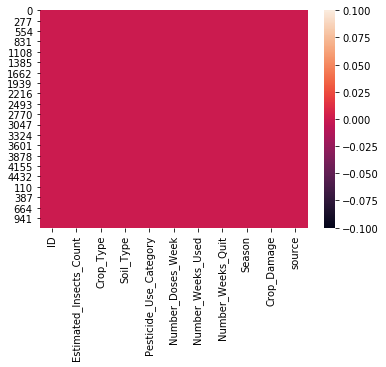

In [28]:
import seaborn as sns           # Checking Null Values with heatmap
sns.heatmap(data.isnull())

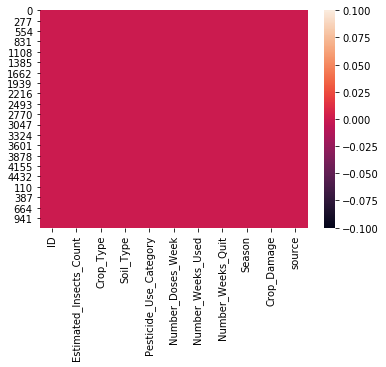

In [29]:
import seaborn as sns
sns.heatmap(data.isnull())

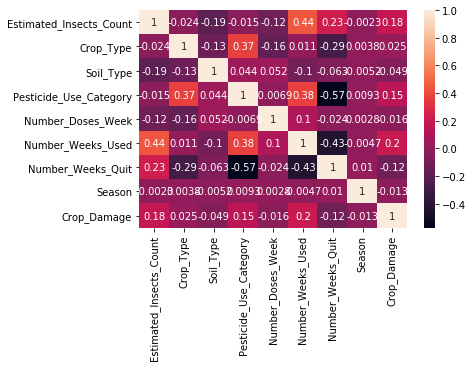

In [30]:
sns.heatmap(data.corr(),annot=True)   # all features are correlated only Pesticide_Use_Category negatively correlated

In [31]:
data.drop(['ID'],axis=1,inplace=True)
data.shape

(5798, 10)

In [32]:
from sklearn.preprocessing import LabelEncoder       # converting string data to numerical
le=LabelEncoder()
data['source']=le.fit_transform(data['source'].astype(str))

data

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,source
0,188,1,0,1,0,0.000000,0,1,0,1
1,209,1,0,1,0,0.000000,0,2,1,1
2,257,1,0,1,0,0.000000,0,2,1,1
3,257,1,1,1,0,0.000000,0,2,1,1
4,342,1,0,1,0,0.000000,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...
1194,1132,0,1,2,40,34.000000,7,3,0,0
1195,1132,0,1,2,40,25.000000,3,1,0,0
1196,1132,0,1,2,20,13.000000,23,1,0,0
1197,1212,0,1,2,10,35.000000,5,1,0,0


In [33]:
data.describe()     # Statistical Description

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,source
count,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000
mean,1347.643153,0.218524,0.472232,2.304243,26.493618,28.920455,8.760262,1.891687,0.154191,0.793205
std,821.330403,0.413280,0.499271,0.484594,15.655508,11.999150,9.582781,0.692997,0.412449,0.405042
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000,1.000000
50%,1132.000000,0.000000,0.000000,2.000000,20.000000,28.891027,6.000000,2.000000,0.000000,1.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,15.000000,2.000000,0.000000,1.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000,1.000000


Observations:
    	Estimated_Insects_Count max-4097 and min-150
        Pesticide_Use_Category  max-1 and min-3
        umber_Doses_Week        max-95 and min-0
        Number_Weeks_Used       max-66 and min-0
        Season                  max-3 and min-0
   Some columns has skewness and present outliers     

In [34]:
data.dtypes

Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int32
source                       int32
dtype: object

In [35]:
import matplotlib.pyplot as plt

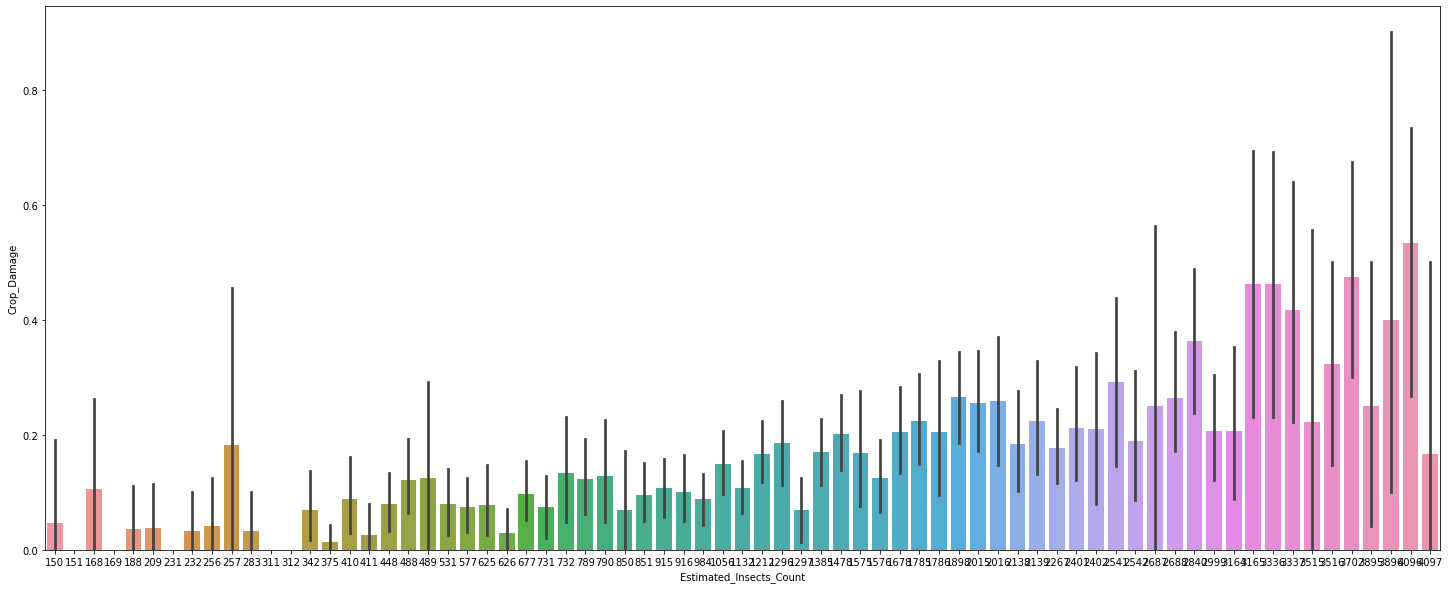

In [36]:
plt.figure(figsize=(25,10))
sns.barplot(x='Estimated_Insects_Count',y='Crop_Damage',data=data)

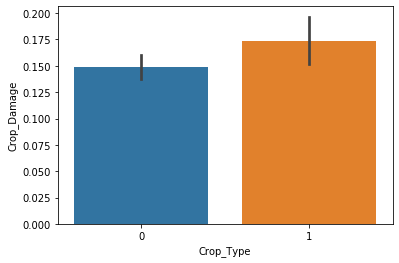

In [37]:
#plt.figure(figsize=(25,10))
sns.barplot(x='Crop_Type',y='Crop_Damage',data=data)       # 1 is slightly gretter than 0 type

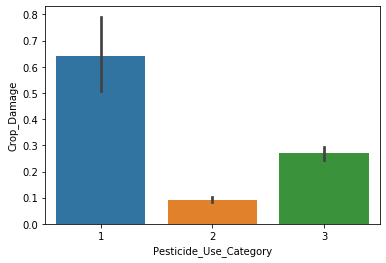

In [38]:
sns.barplot(x='Pesticide_Use_Category',y='Crop_Damage',data=data)  # Pesticide Category 2 giving low crop damage, 1 category has more damage

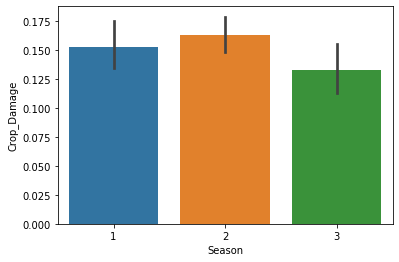

In [39]:
sns.barplot(x='Season',y='Crop_Damage',data=data)

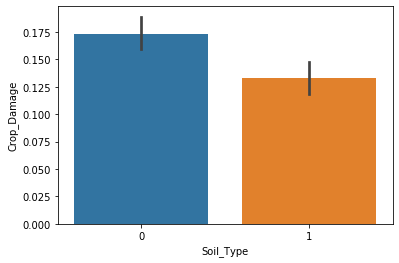

In [40]:
sns.barplot(x='Soil_Type',y='Crop_Damage',data=data)        # 0 soil type has more crop damage than 1

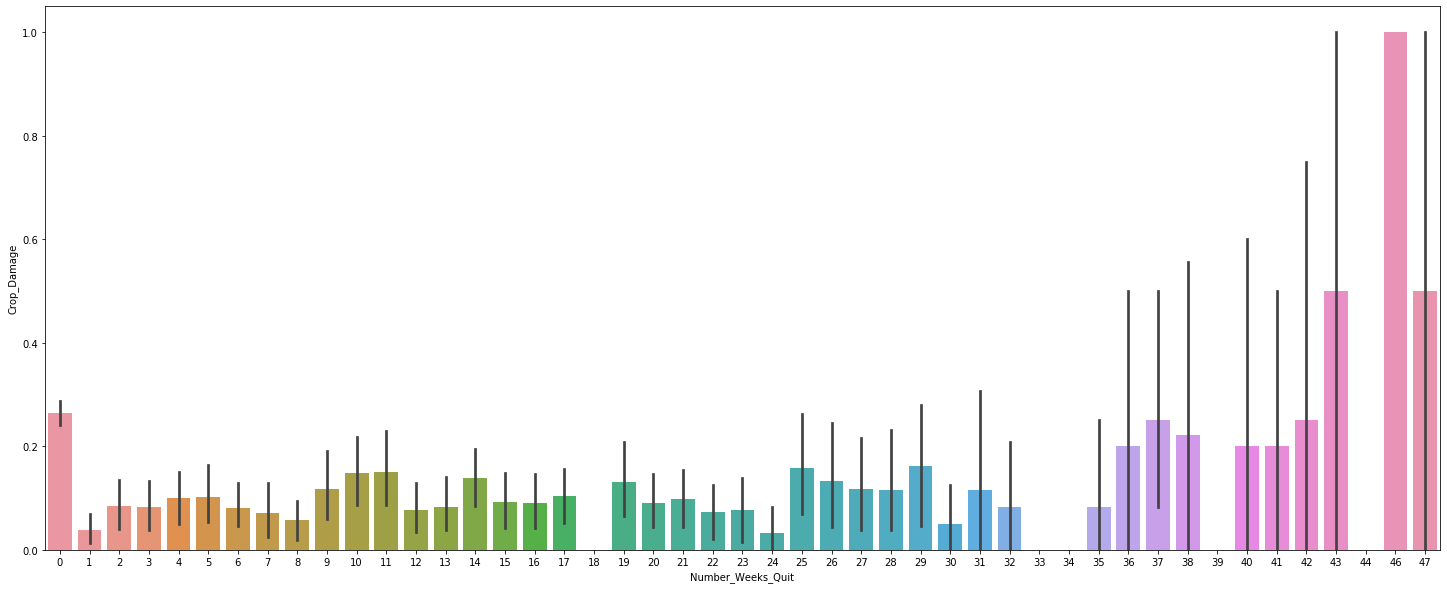

In [41]:
plt.figure(figsize=(25,10))
sns.barplot(x='Number_Weeks_Quit',y='Crop_Damage',data=data)   # 33, 34 weeks quit having less crop damage

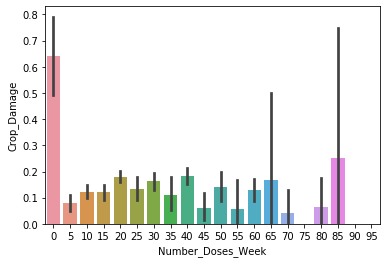

In [42]:
sns.barplot(x='Number_Doses_Week',y='Crop_Damage',data=data)    # 90 Number_Doses_Week having low crop damage

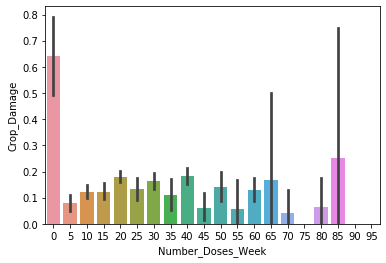

In [43]:
sns.barplot(x='Number_Doses_Week',y='Crop_Damage',data=data)

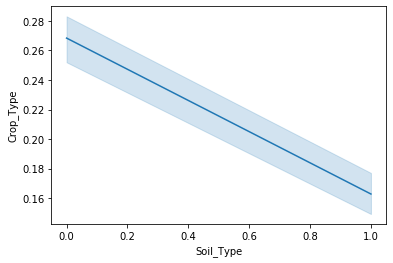

In [44]:
sns.lineplot(x='Soil_Type',y='Crop_Type',data=data)       

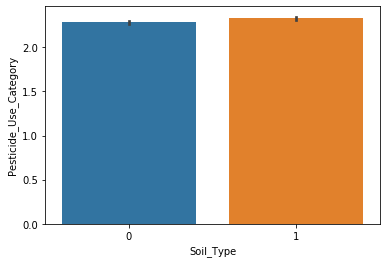

In [45]:
sns.barplot(x='Soil_Type',y='Pesticide_Use_Category',data=data)    # Pesticide_Use_Category high in both soil types

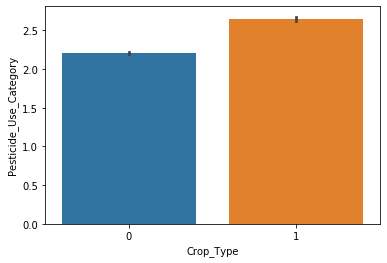

In [46]:
sns.barplot(x='Crop_Type',y='Pesticide_Use_Category',data=data)     # In more cases Pesticide has use

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000A12E58B8C8>,
      dtype=object)

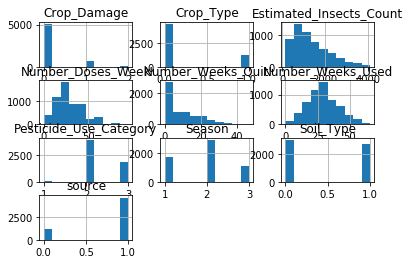

In [47]:
data.hist()

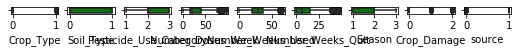

In [48]:
collist = data.columns.values
ncol=11
nrows=5798
plt.figure(figsize=(ncol,80*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data[collist[i]],color='green',orient='V')
    plt.tight_layout()

In [49]:
from scipy.stats import zscore
import numpy as np

In [50]:
z=np.abs(zscore(data))
z

array([[1.41203   , 1.89107487, 0.94592349, ..., 1.28682188, 0.37387483,
        0.51059656],
       [1.38645952, 1.89107487, 0.94592349, ..., 0.15631028, 2.05087491,
        0.51059656],
       [1.32801272, 1.89107487, 0.94592349, ..., 0.15631028, 2.05087491,
        0.51059656],
       ...,
       [0.26257612, 0.52879979, 1.05716796, ..., 1.28682188, 0.37387483,
        1.9584934 ],
       [0.16516478, 0.52879979, 1.05716796, ..., 1.28682188, 0.37387483,
        1.9584934 ],
       [0.16516478, 0.52879979, 1.05716796, ..., 1.59944244, 0.37387483,
        1.9584934 ]])

In [51]:
threshold=3
print(np.where(z>3))

(array([   7,    9,   14,   22,   23,  100,  103,  112,  149,  165,  166,
        167,  179,  185,  186,  197,  207,  222,  223,  242,  248,  252,
        264,  265,  290,  296,  305,  316,  325,  346,  351,  355,  361,
        374,  375,  377,  384,  453,  458,  466,  480,  510,  517,  522,
        557,  595,  612,  634,  693,  702,  703,  704,  705,  706,  807,
        819,  855,  856,  911,  944,  978,  980,  998, 1017, 1019, 1067,
       1097, 1178, 1212, 1291, 1307, 1324, 1326, 1327, 1329, 1337, 1339,
       1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1347, 1348, 1349,
       1406, 1443, 1457, 1489, 1523, 1589, 1652, 1654, 1737, 1807, 1868,
       2019, 2043, 2090, 2128, 2136, 2139, 2140, 2165, 2170, 2171, 2174,
       2183, 2185, 2188, 2190, 2190, 2191, 2192, 2193, 2194, 2237, 2392,
       2531, 2553, 2565, 2585, 2589, 2590, 2590, 2591, 2615, 2663, 2671,
       2696, 2702, 2710, 2714, 2716, 2723, 2767, 2779, 2792, 2796, 2797,
       2804, 2806, 2814, 2828, 2829, 2834, 2841, 2

In [52]:
df=data[(z<3).all(axis=1)]
df

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,source
0,188,1,0,1,0,0.000000,0,1,0,1
1,209,1,0,1,0,0.000000,0,2,1,1
2,257,1,0,1,0,0.000000,0,2,1,1
3,257,1,1,1,0,0.000000,0,2,1,1
4,342,1,0,1,0,0.000000,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...
1194,1132,0,1,2,40,34.000000,7,3,0,0
1195,1132,0,1,2,40,25.000000,3,1,0,0
1196,1132,0,1,2,20,13.000000,23,1,0,0
1197,1212,0,1,2,10,35.000000,5,1,0,0


In [53]:
df.skew()

Estimated_Insects_Count    0.832175
Crop_Type                  1.349880
Soil_Type                  0.095649
Pesticide_Use_Category     0.589436
Number_Doses_Week          0.696343
Number_Weeks_Used          0.265082
Number_Weeks_Quit          0.854188
Season                     0.145126
Crop_Damage                2.410720
source                    -1.416199
dtype: float64

In [54]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()                   # scaling
#print(scaler.fit(df))
#print(scaler.transform(df))

In [55]:
df['Number_Doses_Week']=np.sqrt(df['Number_Doses_Week'])
df['Number_Doses_Week'].skew()

-0.14759653744857884

In [56]:
cols=['Crop_Type','Number_Weeks_Quit','Estimated_Insects_Count','Pesticide_Use_Category']
for i in cols:
    if df[i].skew()>0.55:
        df[i]=np.log1p(df[i])
        

In [57]:
df.skew()

Estimated_Insects_Count   -0.495079
Crop_Type                  1.349880
Soil_Type                  0.095649
Pesticide_Use_Category     0.325364
Number_Doses_Week         -0.147597
Number_Weeks_Used          0.265082
Number_Weeks_Quit         -0.143308
Season                     0.145126
Crop_Damage                2.410720
source                    -1.416199
dtype: float64

In [58]:
train=df.loc[df['source']==1]
test=df.loc[df['source']==0]

In [59]:
train.drop(['source'],axis=1,inplace=True)

In [60]:
train.shape

(4361, 9)

In [61]:
train.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,5.241747,0.693147,0,0.693147,0.0,0.0,0.0,1,0
1,5.347108,0.693147,0,0.693147,0.0,0.0,0.0,2,1
2,5.552960,0.693147,0,0.693147,0.0,0.0,0.0,2,1
3,5.552960,0.693147,1,0.693147,0.0,0.0,0.0,2,1
4,5.837730,0.693147,0,0.693147,0.0,0.0,0.0,2,1


In [62]:
x=train.drop(['Crop_Damage'],axis=1)

In [63]:
x.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,5.241747,0.693147,0,0.693147,0.0,0.0,0.0,1
1,5.347108,0.693147,0,0.693147,0.0,0.0,0.0,2
2,5.552960,0.693147,0,0.693147,0.0,0.0,0.0,2
3,5.552960,0.693147,1,0.693147,0.0,0.0,0.0,2
4,5.837730,0.693147,0,0.693147,0.0,0.0,0.0,2


In [64]:
y=train['Crop_Damage']

In [65]:
y

0       0
1       1
2       1
3       1
4       1
       ..
4594    1
4595    1
4596    0
4597    0
4598    0
Name: Crop_Damage, Length: 4361, dtype: int32

In [66]:
test.drop(['Crop_Damage','source'],axis=1,inplace=True)

In [67]:
test.shape

(1167, 8)

In [69]:
from sklearn.preprocessing import StandardScaler       # scaling data by StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-2.69514385,  1.84769251, -0.96152828, ..., -2.44918269,
        -1.29681775, -1.28870594],
       [-2.5334071 ,  1.84769251, -0.96152828, ..., -2.44918269,
        -1.29681775,  0.1471772 ],
       [-2.21740786,  1.84769251, -0.96152828, ..., -2.44918269,
        -1.29681775,  0.1471772 ],
       ...,
       [ 1.11938503, -0.54121559,  1.04001102, ..., -1.8506627 ,
         1.29425939,  0.1471772 ],
       [ 1.11938503, -0.54121559,  1.04001102, ..., -0.73912559,
         1.20613653,  0.1471772 ],
       [ 1.11938503, -0.54121559,  1.04001102, ...,  0.37241153,
         0.95069622,  0.1471772 ]])

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [71]:
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)

In [72]:

max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    y_preddtc=dtc.predict(x_test)
    r2_scr=r2_score(y_test,y_preddtc)
    print("r2_score corresponding to random state:",r_state, "is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        #final_r_state=r_state
        
print()

#print("max r2 score corresponding to ", "is" , max_r_score)   
print(accuracy_score(y_test,y_preddtc))
print(confusion_matrix(y_test,y_preddtc))
print(classification_report(y_test,y_preddtc))

r2_score corresponding to random state: 42 is:  -0.8017149350872963
r2_score corresponding to random state: 43 is:  -0.9179978794065842
r2_score corresponding to random state: 44 is:  -0.8760976617652125
r2_score corresponding to random state: 45 is:  -0.6734503913687326
r2_score corresponding to random state: 46 is:  -0.7264360520469695
r2_score corresponding to random state: 47 is:  -0.9392113394561374
r2_score corresponding to random state: 48 is:  -0.8422874367984292
r2_score corresponding to random state: 49 is:  -1.1062514970059882
r2_score corresponding to random state: 50 is:  -0.8034271207954302
r2_score corresponding to random state: 51 is:  -0.7728222996515677
r2_score corresponding to random state: 52 is:  -0.8122775569584078
r2_score corresponding to random state: 53 is:  -0.7528861364477801
r2_score corresponding to random state: 54 is:  -0.8299278846153846
r2_score corresponding to random state: 55 is:  -0.8445322793148877
r2_score corresponding to random state: 56 is:  

In [73]:
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)
    svc=SVC()
    svc.fit(x_train,y_train)
    y_predsvc=svc.predict(x_test)
    r2_scr=r2_score(y_test,y_predsvc)
    print("r2_score corresponding to random state:",r_state, "is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        #final_r_state=r_state
        
print()

print("max r2 score corresponding to ", "is" , max_r_score)   
print(accuracy_score(y_test,y_predsvc))
print(confusion_matrix(y_test,y_predsvc))
print(classification_report(y_test,y_predsvc))

r2_score corresponding to random state: 42 is:  -0.09921140535142392
r2_score corresponding to random state: 43 is:  -0.1356566391223195
r2_score corresponding to random state: 44 is:  -0.12400564757739607
r2_score corresponding to random state: 45 is:  -0.14541992807277326
r2_score corresponding to random state: 46 is:  -0.100179837088755
r2_score corresponding to random state: 47 is:  -0.1421626109508607
r2_score corresponding to random state: 48 is:  -0.11041982491960112
r2_score corresponding to random state: 49 is:  -0.07611976047904201
r2_score corresponding to random state: 50 is:  -0.12104929130526743
r2_score corresponding to random state: 51 is:  -0.09547038327526103
r2_score corresponding to random state: 52 is:  -0.12228197334580293
r2_score corresponding to random state: 53 is:  -0.15512773047019612
r2_score corresponding to random state: 54 is:  -0.1358173076923077
r2_score corresponding to random state: 55 is:  -0.13306982872200246
r2_score corresponding to random state:

In [74]:
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)
    knn=KNeighborsClassifier()
    knn.fit(x_train,y_train)
    y_predknn=knn.predict(x_test)
    r2_scr=r2_score(y_test,y_predsvc)
    print("r2_score corresponding to random state:",r_state, "is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        #final_r_state=r_state
        
print()

print("max r2 score corresponding to ", "is" , max_r_score)   
print(accuracy_score(y_test,y_predknn))
print(confusion_matrix(y_test,y_predknn))
print(classification_report(y_test,y_predknn))

r2_score corresponding to random state: 42 is:  -0.23144736388994103
r2_score corresponding to random state: 43 is:  -0.19454253892866213
r2_score corresponding to random state: 44 is:  -0.19838837425531186
r2_score corresponding to random state: 45 is:  -0.21853183837529078
r2_score corresponding to random state: 46 is:  -0.19327197715011124
r2_score corresponding to random state: 47 is:  -0.18324759695628723
r2_score corresponding to random state: 48 is:  -0.21136708173047403
r2_score corresponding to random state: 49 is:  -0.177293413173653
r2_score corresponding to random state: 50 is:  -0.20228474719695333
r2_score corresponding to random state: 51 is:  -0.21254355400696845
r2_score corresponding to random state: 52 is:  -0.21372717117397944
r2_score corresponding to random state: 53 is:  -0.20359462825216235
r2_score corresponding to random state: 54 is:  -0.21694711538461542
r2_score corresponding to random state: 55 is:  -0.20333772507685532
r2_score corresponding to random sta

In [75]:
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)
    rf=RandomForestClassifier(n_estimators=100)
    rf.fit(x_train,y_train)
    y_predrf=rf.predict(x_test)
    r2_scr=r2_score(y_test,y_predsvc)
    print("r2_score corresponding to random state:",r_state, "is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        #final_r_state=r_state
        
print()

print("max r2 score corresponding to ", "is" , max_r_score)   
print(accuracy_score(y_test,y_predrf))
print(confusion_matrix(y_test,y_predrf))
print(classification_report(y_test,y_predrf))

r2_score corresponding to random state: 42 is:  -0.23144736388994103
r2_score corresponding to random state: 43 is:  -0.19454253892866213
r2_score corresponding to random state: 44 is:  -0.19838837425531186
r2_score corresponding to random state: 45 is:  -0.21853183837529078
r2_score corresponding to random state: 46 is:  -0.19327197715011124
r2_score corresponding to random state: 47 is:  -0.18324759695628723
r2_score corresponding to random state: 48 is:  -0.21136708173047403
r2_score corresponding to random state: 49 is:  -0.177293413173653
r2_score corresponding to random state: 50 is:  -0.20228474719695333
r2_score corresponding to random state: 51 is:  -0.21254355400696845
r2_score corresponding to random state: 52 is:  -0.21372717117397944
r2_score corresponding to random state: 53 is:  -0.20359462825216235
r2_score corresponding to random state: 54 is:  -0.21694711538461542
r2_score corresponding to random state: 55 is:  -0.20333772507685532
r2_score corresponding to random sta

In [76]:
from sklearn.model_selection import cross_val_score  
list=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),RandomForestClassifier()]
for i in list:
    scores = cross_val_score(i,x_train,y_train,cv=5,scoring="accuracy")
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard Deviation:",scores.std())

Scores: [0.78267254 0.76617647 0.73382353 0.79411765 0.78235294]
Mean: 0.771828625723417
Standard Deviation: 0.020983261787881444
Scores: [0.86196769 0.86470588 0.86470588 0.86029412 0.85882353]
Mean: 0.8620994212663039
Standard Deviation: 0.0023492645366566755
Scores: [0.82232012 0.86029412 0.83970588 0.86176471 0.84117647]
Mean: 0.845052258788978
Standard Deviation: 0.014642239399912308
Scores: [0.83406755 0.85882353 0.84705882 0.84411765 0.85735294]
Mean: 0.8482840977800812
Standard Deviation: 0.009102685798906657


In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [ ]:
parameters={'kernel':('linear'),'C':[0.1,1]}#,'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
svc=svm.SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x_train,y_train)

In [80]:
sv=svm.SVC(kernel='linear',C=100,gamma=0.001)
sv.fit(x_train,y_train)
print(accuracy_score(y_test,sv.predict(x_test)))

0.8427083333333333


In [81]:
from xgboost import XGBClassifier

In [82]:
xgb = XGBClassifier(n_jobs=4)
xgb.fit(x_train, y_train, verbose=True)
xgb_pre=xgb.predict(x_test)
r2_scr=r2_score(y_test,xgb_pre)
print(accuracy_score(y_test,xgb_pre))
print(confusion_matrix(y_test,xgb_pre))
print(classification_report(y_test,xgb_pre))

0.846875
[[781  28]
 [119  32]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.91       809
           1       0.53      0.21      0.30       151

    accuracy                           0.85       960
   macro avg       0.70      0.59      0.61       960
weighted avg       0.82      0.85      0.82       960



In [83]:
from sklearn.externals import joblib   # saving model
joblib.dump(svc,'svcCropDamage.obj')

['svcCropDamage.obj']

Conclusion: Agriculture crop damage prediction impacted from Soil_Type, Pesticide_Use_Category, Number_Doses_Week, 	         Number_Weeks_Used, Season.
            I have applied all classification models, cross-validation,ensemble technique. SVC is working preety good with accuracy of 86% so I have model with svc. 